## CUSTOMER CHURN PREDICTION
- Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service. It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones.
- During churn prediction, you’re also:
  - Identifying at-risk customers,
  - Identifying customer pain points,
  - Identifying strategy/methods to lower churn and increase customer retention.

In [62]:
# import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [63]:
#import data 
df=pd.read_csv("banking_churn.csv", low_memory=False)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [65]:
# check missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [66]:
#  Rid columns that have no effect on churn
data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [68]:
# Isolate columns without numerical data i.e. Geography  and Gender
data =  data.drop(['Geography', 'Gender'], axis=1)

In [89]:
# Convert Geography and Gender (categorical columns) to numerical data since ML algorithms work best with numbers
# Use pandas library "get_dummies" method to convert 
Geography = pd.get_dummies(df.Geography)
Gender = pd.get_dummies(df.Gender)
print(Geography)

      France  Germany  Spain
0          1        0      0
1          0        0      1
2          1        0      0
3          1        0      0
4          0        0      1
...      ...      ...    ...
9995       1        0      0
9996       1        0      0
9997       1        0      0
9998       0        1      0
9999       1        0      0

[10000 rows x 3 columns]


In [70]:
# Use concat to restore columns back with data 
data = pd.concat([data,Geography,Gender], axis=1)

In [71]:
# Isolate the predictive variable from the dataset
y = data['Exited']
X =  data.drop(['Exited'], axis=1)

In [72]:
# Split the data for training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [73]:
# Train the algorithm, and use it to make predictions for new data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)

In [74]:
# Experiment to improve baseline model
np.random.seed(42)
for i in range(10, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 85.25%

Trying model with 20 estimators...
Model accuracy on test set: 85.8%

Trying model with 30 estimators...
Model accuracy on test set: 86.5%

Trying model with 40 estimators...
Model accuracy on test set: 86.4%

Trying model with 50 estimators...
Model accuracy on test set: 86.8%

Trying model with 60 estimators...
Model accuracy on test set: 86.6%

Trying model with 70 estimators...
Model accuracy on test set: 86.65%

Trying model with 80 estimators...
Model accuracy on test set: 86.6%

Trying model with 90 estimators...
Model accuracy on test set: 86.55000000000001%

Trying model with 100 estimators...
Model accuracy on test set: 86.6%

Trying model with 110 estimators...
Model accuracy on test set: 86.5%

Trying model with 120 estimators...
Model accuracy on test set: 86.6%

Trying model with 130 estimators...
Model accuracy on test set: 86.85000000000001%

Trying model with 140 estimators...
Model accuracy on test

In [75]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 180, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 85.25%
Cross-validation score: 85.65000000000002%

Trying model with 20 estimators...
Model accuracy on test set: 86.6%
Cross-validation score: 85.61%

Trying model with 30 estimators...
Model accuracy on test set: 86.45%
Cross-validation score: 86.15%

Trying model with 40 estimators...
Model accuracy on test set: 86.1%
Cross-validation score: 86.07%

Trying model with 50 estimators...
Model accuracy on test set: 86.55000000000001%
Cross-validation score: 86.17999999999999%

Trying model with 60 estimators...
Model accuracy on test set: 86.6%
Cross-validation score: 86.26000000000002%

Trying model with 70 estimators...
Model accuracy on test set: 86.85000000000001%
Cross-validation score: 86.05000000000001%

Trying model with 80 estimators...
Model accuracy on test set: 86.7%
Cross-validation score: 86.15%

Trying model with 90 estimators...
Model accuracy on test set: 86.7%
Cross-validation score: 86.1%

Trying model wit

In [76]:
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 101, 10)], 'max_depth': [0,5,10]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5,
                    scoring='recall'
                   )

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
grid.best_params_

C:\Users\The Mings\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\The Mings\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\The Mings\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\The Mings\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\The Mings\anaconda3

{'max_depth': 10, 'n_estimators': 20}

In [78]:
# Veiw the new table with data
df.transpose()
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [79]:
# Set the model to be the best estimator
clf = grid.best_estimator_
clf

RandomForestClassifier(max_depth=10, n_estimators=20)

In [80]:
# Fit the best model
clf = clf.fit(X_train, y_train)

In [81]:
# Find the best model scores
clf.score(X_test, y_test)

0.871

<AxesSubplot:>

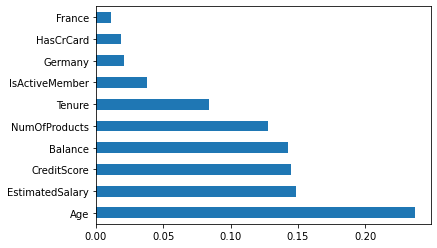

In [82]:
# Find features running significant role in identifying customer churn
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [83]:
# Save a model for later use
import pickle

# Save an existing model to file
pickle.dump(model, open("random_forest_model_customer_churn_1.pkl", "wb"))

In [84]:
# Load a saved model and make a prediction to test working
loaded_model = pickle.load(open("random_forest_model_customer_churn_1.pkl", "rb"))
y_test_pred = loaded_model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
import joblib
filename='mymodel'
joblib.dump(model, filename)

['mymodel']

In [86]:
mymodel = joblib.load(filename)

In [87]:
mymodel.score(X_test, y_test)

0.8655